# 🤗Hugging Face Pipeline

Transformer models are usually very large. With millions to tens of billions of parameters, training and deploying these models is a complicated undertaking. Furthermore, with new models being released on a near-daily basis and each having its own implementation, trying them all out is no easy task.

The 🤗Transformers library was created to solve this problem. Its goal is to provide a single API through which any Transformer model can be loaded, trained, and saved.

## Abstract

This notebook explores the most basic usage of the 🤗Hugging Face library to instanciate pre-trained transformer models for inference on a variety of NLP tasks.

## Table of Contents

>[🤗Hugging Face Transformers](#folderId=1X-L7fUWO2CW47sJtqL_OmGFMJt9MEXXa&updateTitle=true&scrollTo=t6vmc7VZDYw5)

>>[Abstract](#folderId=1X-L7fUWO2CW47sJtqL_OmGFMJt9MEXXa&updateTitle=true&scrollTo=xTbr9nKZD4js)

>>[Table of Contents](#folderId=1X-L7fUWO2CW47sJtqL_OmGFMJt9MEXXa&updateTitle=true&scrollTo=y6nFHLoVD5j1)

>>[Architectures vs. Checkpoints](#folderId=1X-L7fUWO2CW47sJtqL_OmGFMJt9MEXXa&updateTitle=true&scrollTo=O9ffX-IDD0th)

>>[🤗Hugging Face Pipeline](#folderId=1X-L7fUWO2CW47sJtqL_OmGFMJt9MEXXa&updateTitle=true&scrollTo=kMo8DU6oFVZC)

>>[Behind the Pipeline](#folderId=1X-L7fUWO2CW47sJtqL_OmGFMJt9MEXXa&updateTitle=true&scrollTo=p4nv2mXGN95f)

>>>[Preprocessing with Tokenizers](#folderId=1X-L7fUWO2CW47sJtqL_OmGFMJt9MEXXa&updateTitle=true&scrollTo=EA63_KsTPaad)

>>>[Going Through the Model](#folderId=1X-L7fUWO2CW47sJtqL_OmGFMJt9MEXXa&updateTitle=true&scrollTo=g_qsB0urbPD9)

>>>[Model Heads](#folderId=1X-L7fUWO2CW47sJtqL_OmGFMJt9MEXXa&updateTitle=true&scrollTo=iFYc1eSWcoH1)

>>>[Postprocessing the Model's Output](#folderId=1X-L7fUWO2CW47sJtqL_OmGFMJt9MEXXa&updateTitle=true&scrollTo=D7cC576PdfGy)



## Architectures vs. Checkpoints

- **Architecture**: This is the skeleton of the model — the definition of each layer and each operation that happens within the model.

- **Checkpoints**: These are the weights that will be loaded in a given architecture.

- **Model**: This is an umbrella term that isn’t as precise as “architecture” or “checkpoint”: it can mean both.

For example, `BERT` is an architecture while `bert-base-cased`, a set of weights trained by the Google team for the first release of BERT, is a checkpoint. However, one can say “the `BERT` model” and “the `bert-base-cased` model.”

## 🤗Hugging Face Pipeline

The most basic object in the 🤗Transformers library is the [`pipeline()`](https://huggingface.co/docs/transformers/v4.21.1/en/main_classes/pipelines#transformers.pipeline) function. It connects any model from the [Model Hub](https://huggingface.co/models) with its necessary preprocessing and postprocessing steps for inference on a variety of NLP tasks.

In [1]:
# Install the 🤗Transformers library
!pip install transformers -q

     |████████████████████████████████| 5.3 MB 8.8 MB/s 
     |████████████████████████████████| 7.6 MB 47.1 MB/s 
     |████████████████████████████████| 163 kB 49.4 MB/s 


By default, the pipeline selects a particular pretrained model that has been fine-tuned for sentiment analysis in English. The model is downloaded and cached when the classifier object is created. If the command is rerun, the cached model will be used instead and there is no need to download the model again.

There are three main steps involved when text is passed to the pipeline:

- The text is preprocessed into the expected format of the model.
- The preprocessed inputs are passed to the model.
- The predictions of the model are post-processed.

In [7]:
from transformers import pipeline

# Instanciate a sentiment analysis transformer pipeline
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [8]:
inference_sentences = [
    "Stranger Things is a really good show!",
    "Extremely overrated..."
]

# Use the classifier pipeline to infer the sentences sentiment
classifier(inference_sentences)

[{'label': 'POSITIVE', 'score': 0.9998636245727539},
 {'label': 'NEGATIVE', 'score': 0.9950336217880249}]

## Behind the Pipeline

As explained above, the pipeline groups together three steps: preprocessing of the inputs, passing them through the model, and postprocessing the model's outputs:

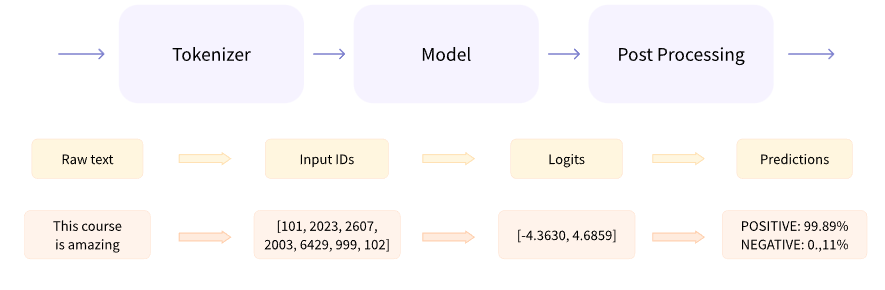

### Preprocessing with Tokenizers

Like other neural networks, Transformer models can’t process raw text directly, so the first step of our pipeline is to convert the text inputs into numbers that the model can make sense of. To do this we use a tokenizer, which will be responsible for:

- Splitting the input into words, subwords, or symbols (like punctuation) that are called tokens.
- Mapping each token to an integer corresponding to an index in a learned vocabulary.
- Adding additional inputs that may be useful to the model.

All this preprocessing needs to be done in exactly the same way as when the model was pretrained. This is done by using the `AutoTokenizer` class and its `from_pretrained()` method. Using the checkpoint name of the model, it will automatically fetch the data associated with the model’s tokenizer and cache it.


Since the default checkpoint of the `sentiment-analysis` pipeline is `distilbert-base-uncased-finetuned-sst-2-english`, this checkpoint is used to retrieve the corresponding tokenizer. 


In [6]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

Once the tokenizer is instanciated, we can directly pass sentences to it and we’ll get back a dictionary that’s ready to feed the model. The only thing left to do is to convert the list of input IDs to tensors. To specify the type of tensors we want to get back (PyTorch, TensorFlow, or plain NumPy), we use the `return_tensors` argument (if no type is passed, you will get a list of lists as a result).

The tokenized output is a dictionary containing two keys, `input_ids` and `attention_mask`.

In [17]:
model_inputs = tokenizer(
    inference_sentences,
    padding=True,
    truncation=True,
    return_tensors="pt"
)

model_inputs

{'input_ids': tensor([[ 101, 7985, 2477, 2003, 1037, 2428, 2204, 2265,  999,  102],
        [ 101, 5186, 2058, 9250, 1012, 1012, 1012,  102,    0,    0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0]])}

### Going Through the Model

Pretrained models can be downloaded the same way we did with the tokenizer. 🤗Transformers provides an `AutoModel` class which also has a `from_pretrained()` method:

In [13]:
from transformers import AutoModel

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModel.from_pretrained(checkpoint)

Some weights of the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing DistilBertModel: ['pre_classifier.bias', 'classifier.bias', 'classifier.weight', 'pre_classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


This architecture contains only the base Transformer module: given some inputs, it outputs what's called hidden states, also known as features. For each model input, we’ll retrieve a high-dimensional vector representing the contextual understanding of that input by the Transformer model.

The vector output by the Transformer module is usually large. It generally has three dimensions:

- Batch size: The number of sequences processed at a time (2 in our example).
- Sequence length: The length of the numerical representation of the sequence (10 in our example).
- Hidden size: The vector dimension of each model input.

In [18]:
model_outputs = model(**model_inputs)
print(model_outputs.last_hidden_state.shape)

torch.Size([2, 10, 768])


### Model Heads

The model heads take the high-dimensional vector of hidden states as input and project them onto a different dimension. They are usually composed of one or a few linear layers:

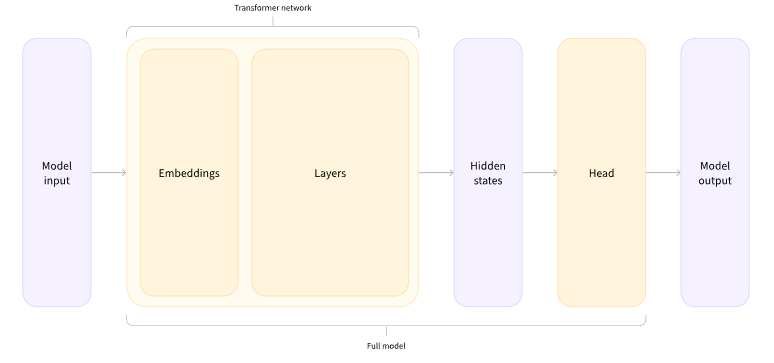

For our example, we will need a model with a sequence classification head (to be able to classify the sentences as positive or negative). So, we won’t actually use the `AutoModel` class, but `AutoModelForSequenceClassification`:

In [19]:
from transformers import AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

Since we have just two sentences and two labels, the result we get from our model is of shape 2 x 2.

In [20]:
model_outputs = model(**model_inputs)
print(model_outputs.logits.shape)

torch.Size([2, 2])


### Postprocessing the Model's Output

All 🤗Transformers models output the logits, which are raw, unnormalized scores outputted by the last layer of the model. To be converted to probabilities, they need to go through a SoftMax layer.

In [21]:
model_outputs.logits

tensor([[-4.2729,  4.6272],
        [ 2.9108, -2.3893]], grad_fn=<AddmmBackward0>)

In [32]:
import torch

predictions = torch.nn.functional.softmax(model_outputs.logits, dim=-1)
predictions = predictions.detach().numpy()
print(predictions)

[[1.3636413e-04 9.9986362e-01]
 [9.9503362e-01 4.9664052e-03]]


To get the labels corresponding to each position, we can inspect the `id2label` attribute of the model config.

In [33]:
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}

In [34]:
import numpy as np

sentiments = np.argmax(predictions, axis=1)
sentiments = [model.config.id2label[s] for s in sentiments]
sentiments

['POSITIVE', 'NEGATIVE']

In [40]:
for score, sentiment in zip(predictions, sentiments):
  print(f"{sentiment}: {np.max(score)}")

POSITIVE: 0.9998636245727539
NEGATIVE: 0.9950336217880249
